In [51]:
from stock_env import StockEnv
import pandas as pd
import numpy as np
from replay_buffer import Buffer
from ddpg import ActorCritic
import tensorflow as tf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
env_args = {
    "asset_codes": ['AAPL', 'V', 'BABA', 'ADBE', 'SNE'],
    "features": ["close", "high", "low"],
    "start_date": "2015-1-5",
    "end_date": "2017-12-29", 
    "window_len": 50,
    "data_path": "AmericaStock.csv"
}

In [53]:
stock_env = StockEnv(**env_args)

In [54]:
print(f'total number of states: {len(stock_env.states)}')

total number of states: 1041


In [55]:
# stock_env.states[0]

In [56]:
state_dim = tuple(stock_env.states[0].shape[1: ])
action_dim = (len(env_args['asset_codes']) + 1, )
print(f'state dimention {state_dim}')
print(f'action dimention {action_dim}')

state dimention (5, 50, 3)
action dimention (6,)


In [57]:
# action0 = tf.cast(tf.convert_to_tensor([0.10840821, 0.21311744, 0.43196115, 0.17436635, 0.03880751, 0.03333935]), tf.float32)

In [58]:
# stock_env.states[0].shape

In [59]:
# done = False
# step = 0
# stock_env.reset()
# while done is False:
#     print(f' ------------------------ step {step}----------------------------')
#     reward, done, nxt_state = stock_env.step(action0)
#     print(nxt_state)
#     print(f"done: {done}")
#     step += 1

In [100]:
actor_critic = ActorCritic(state_dim, action_dim, gamma=0.4,verbose=False)

In [101]:
train_args = {
    "env": stock_env,
    "num_eps": 20,
    "actor_lr": 0.0002,
    "critic_lr": 0.0001,
    "train_every_step": 1,
    "batch_size": 16,
    "verbose": False,
    "rho": 0.99
}

In [102]:
rewards_history, detail_reward_history, loss_history, detail_loss_historys = actor_critic.train(**train_args)

Episode 0 >>>>>>>>>>>>>>>>>>> reward: -1.3758523190583332
Episode 1 >>>>>>>>>>>>>>>>>>> reward: -1.7714863497483513
Episode 2 >>>>>>>>>>>>>>>>>>> reward: -1.7362815474669437
Episode 3 >>>>>>>>>>>>>>>>>>> reward: -1.7311026159043792
Episode 4 >>>>>>>>>>>>>>>>>>> reward: -1.6916639104050972
Episode 5 >>>>>>>>>>>>>>>>>>> reward: -1.6273321249708326
Episode 6 >>>>>>>>>>>>>>>>>>> reward: -1.6428332443559803
Episode 7 >>>>>>>>>>>>>>>>>>> reward: -1.2686597816148995
Episode 8 >>>>>>>>>>>>>>>>>>> reward: -1.3574884445459656
Episode 9 >>>>>>>>>>>>>>>>>>> reward: -1.3232905930928833
Episode 10 >>>>>>>>>>>>>>>>>>> reward: -1.2835138895791203
Episode 11 >>>>>>>>>>>>>>>>>>> reward: -1.2351605455023744
Episode 12 >>>>>>>>>>>>>>>>>>> reward: -1.4735611886158815
Episode 13 >>>>>>>>>>>>>>>>>>> reward: -1.5729868173546446
Episode 14 >>>>>>>>>>>>>>>>>>> reward: -1.4089602535183323
Episode 15 >>>>>>>>>>>>>>>>>>> reward: -1.5916136485829233
Episode 16 >>>>>>>>>>>>>>>>>>> reward: -1.608042589273764
Episode 

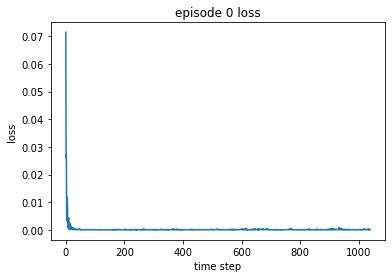

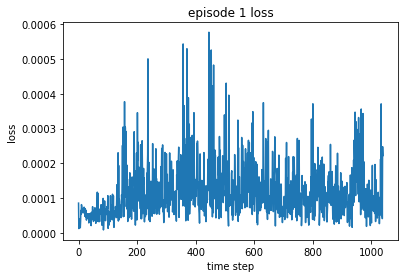

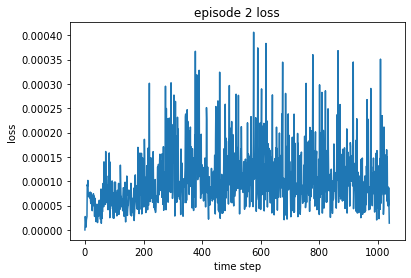

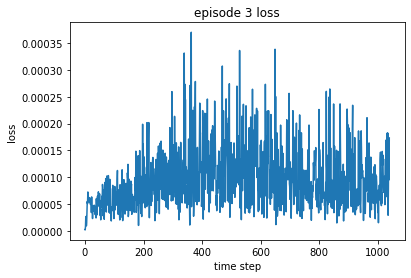

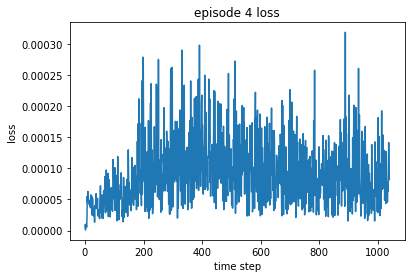

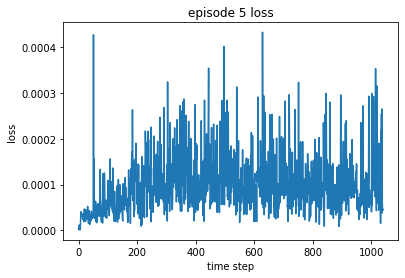

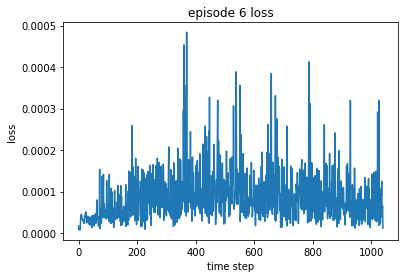

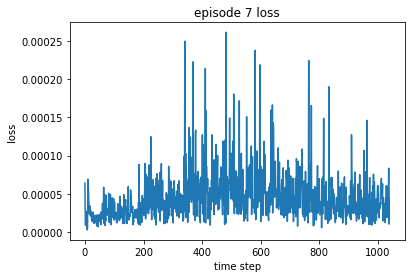

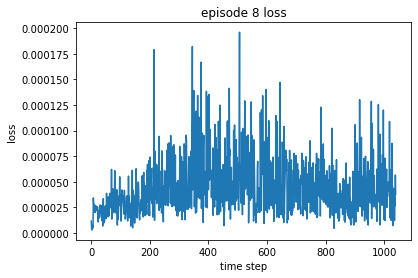

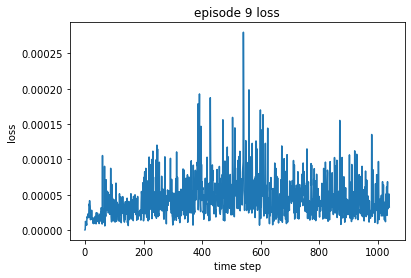

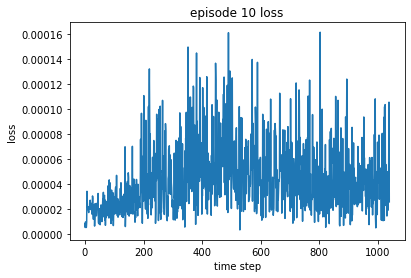

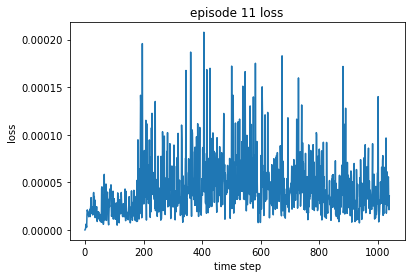

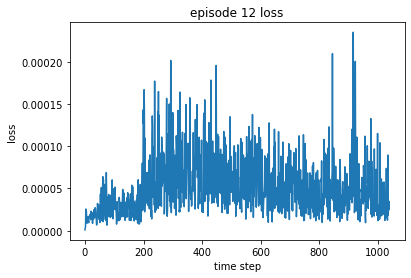

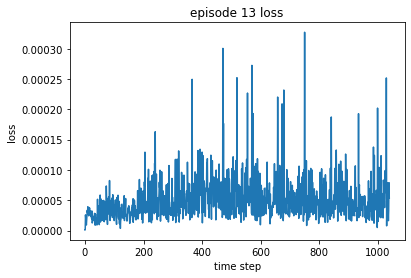

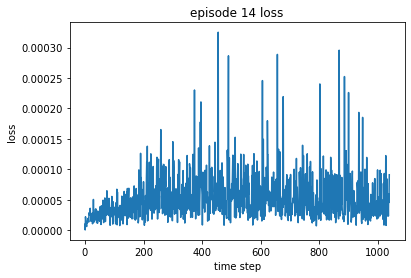

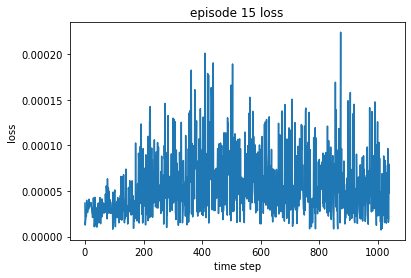

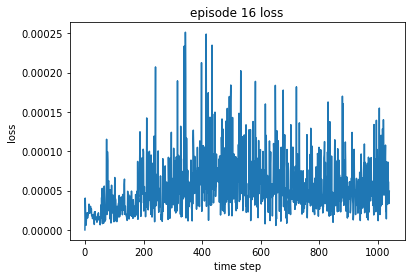

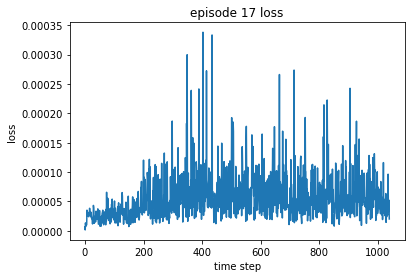

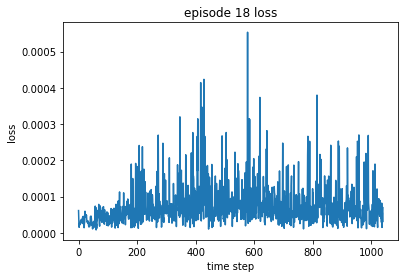

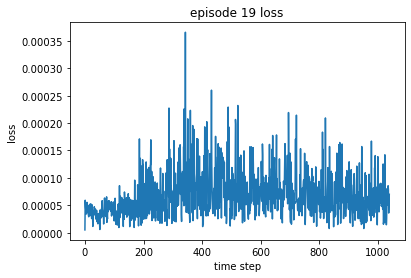

In [103]:
# print(detail_loss_historys)
for i in range(train_args["num_eps"]):
    plt.plot(detail_loss_historys[i])
    plt.ylabel("loss")
    plt.xlabel("time step")
    plt.title(f"episode {i} loss")
    plt.show()

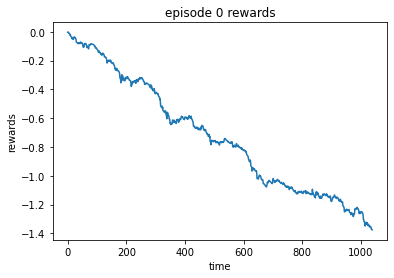

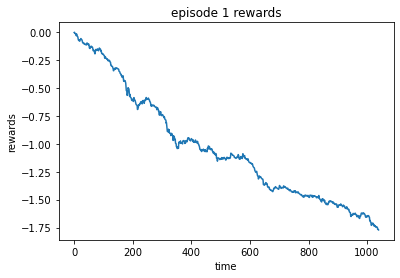

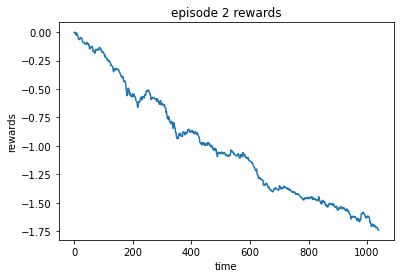

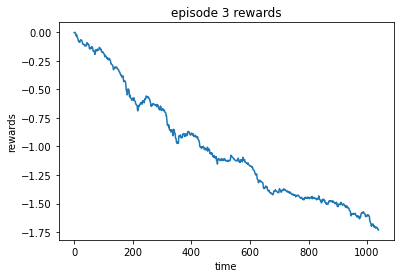

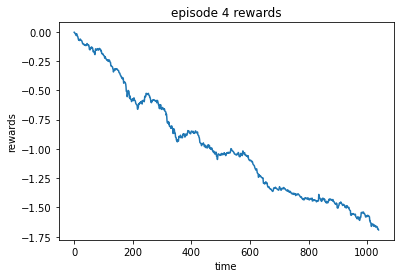

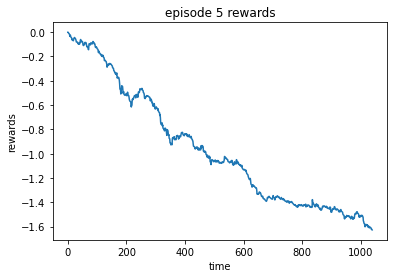

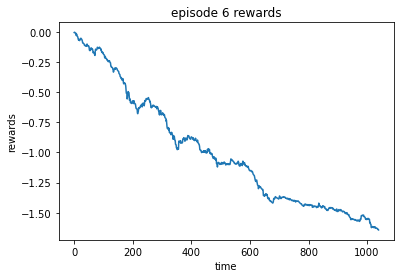

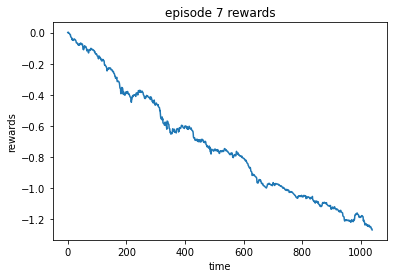

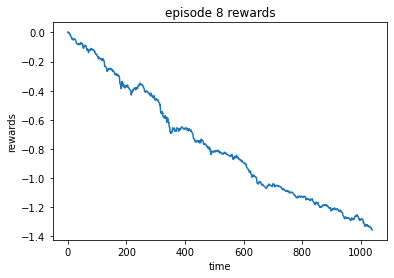

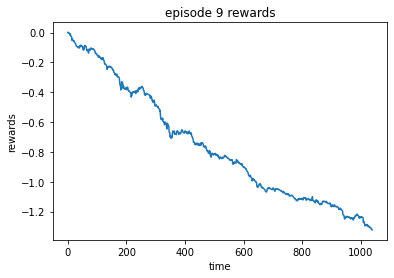

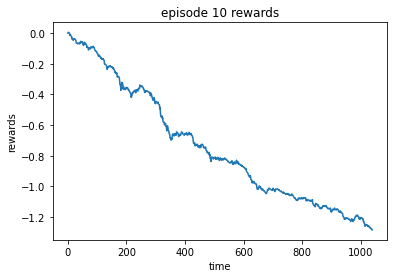

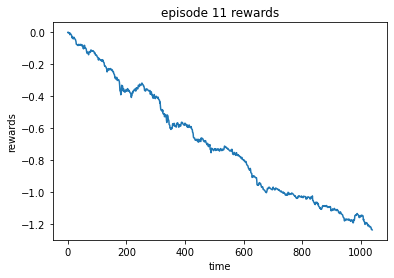

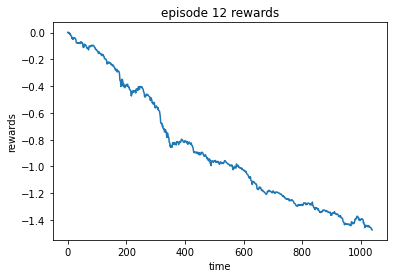

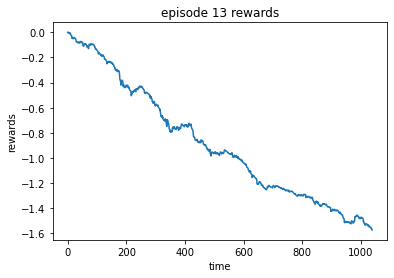

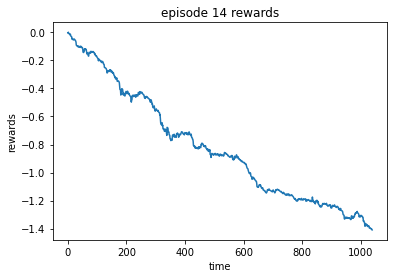

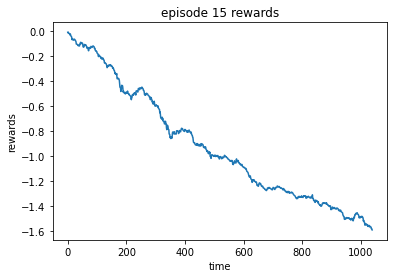

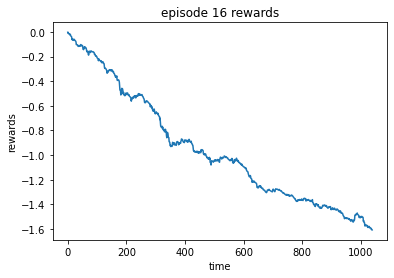

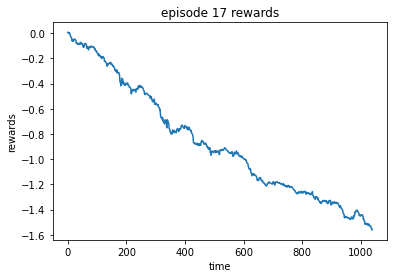

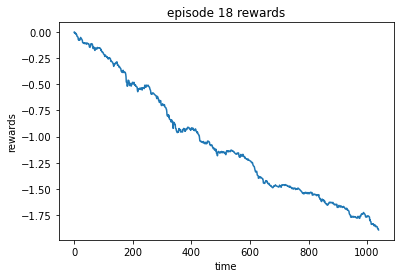

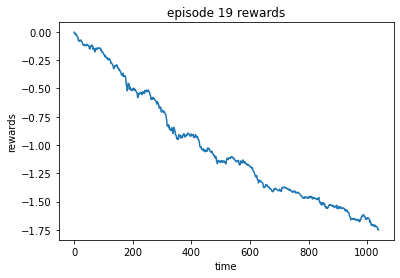

In [104]:
# print(detail_reward_history[0])
for i in range(train_args["num_eps"]):
    plt.plot(detail_reward_history[i])
    plt.ylabel("rewards")
    plt.xlabel("time")
    plt.title(f"episode {i} rewards")
    plt.show()

In [57]:
# for i, eps_rewards in enumerate(rewards):
#     print(f'---------------episode {i}--------------')
# #     x = np.arange(train_args["num_eps"])
#     plt.plot(eps_rewards)
#     plt.ylabel("rewards")
#     plt.xlabel("step")
#     # for i, j in zip(x, rewards):
#     #     plt.text(i, j, str(j))
#     plt.show()
